# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (8,5)

# Load the dataset
df = pd.read_csv("loan_data.csv")

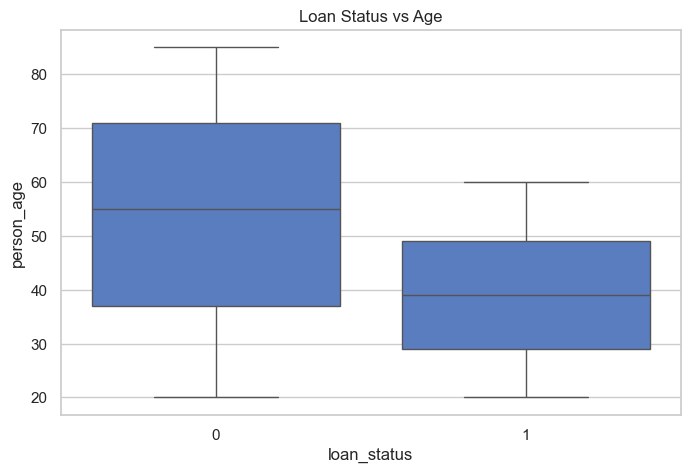

In [3]:
plt.figure()
sns.boxplot(x="loan_status", y="person_age", data=df)
plt.title("Loan Status vs Age")
plt.show()

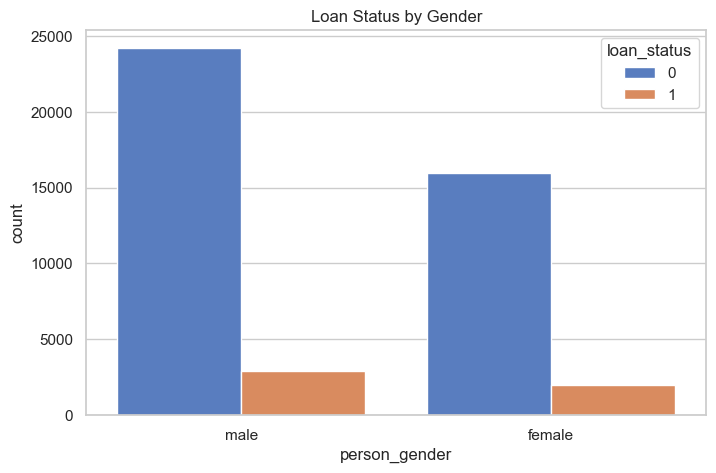

In [4]:
plt.figure()
sns.countplot(x="person_gender", hue="loan_status", data=df)
plt.title("Loan Status by Gender")
plt.show()

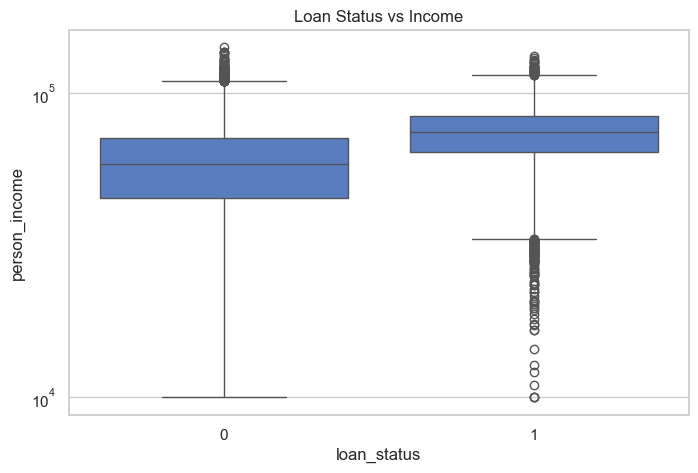

In [5]:
plt.figure()
sns.boxplot(x="loan_status", y="person_income", data=df)
plt.yscale("log")  # log scale helps if incomes vary a lot
plt.title("Loan Status vs Income")
plt.show()

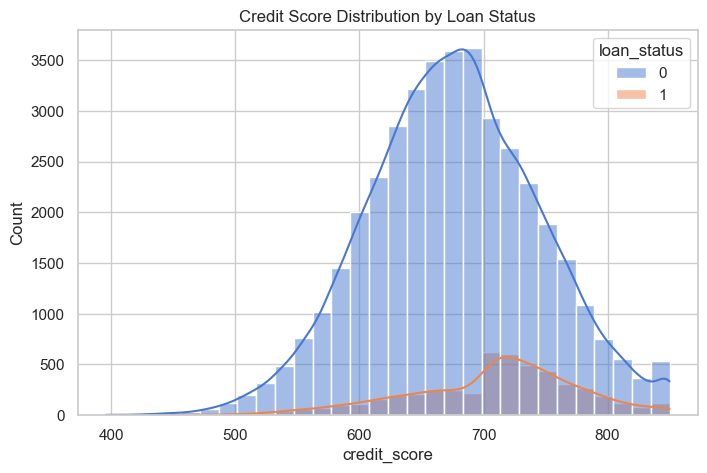

In [6]:
plt.figure()
sns.histplot(data=df, x="credit_score", hue="loan_status", kde=True, bins=30)
plt.title("Credit Score Distribution by Loan Status")
plt.show()

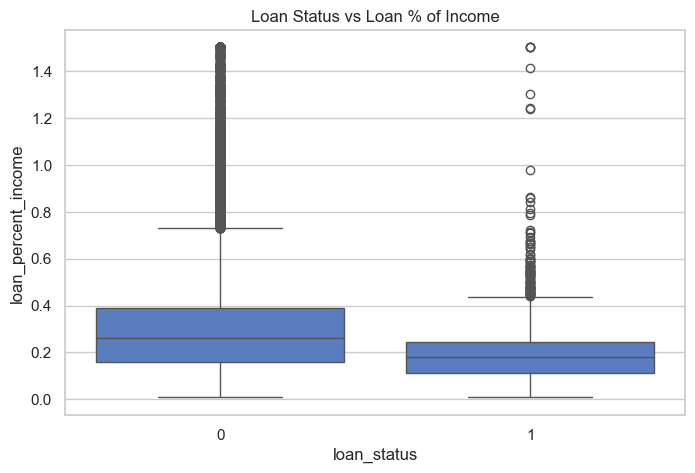

In [7]:
plt.figure()
sns.boxplot(x="loan_status", y="loan_percent_income", data=df)
plt.title("Loan Status vs Loan % of Income")
plt.show()

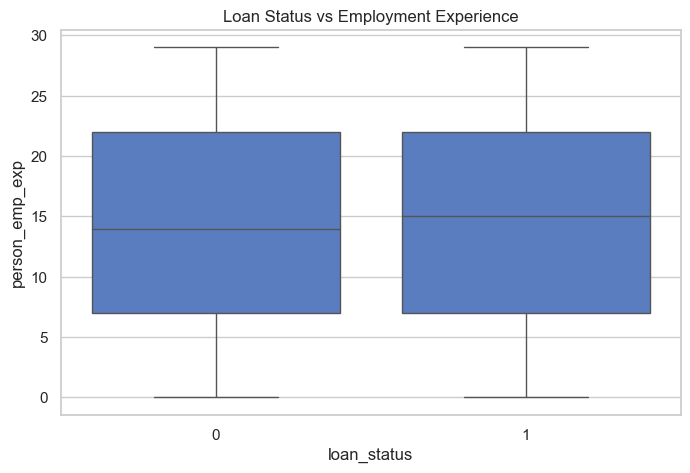

In [8]:
plt.figure()
sns.boxplot(x="loan_status", y="person_emp_exp", data=df)
plt.title("Loan Status vs Employment Experience")
plt.show()

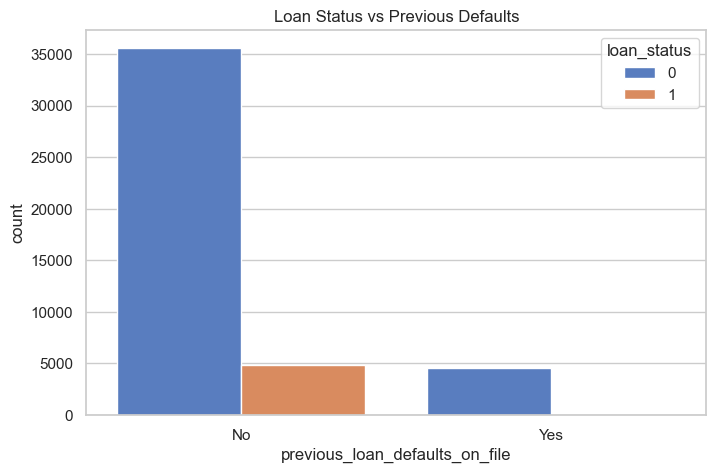

In [9]:
plt.figure()
sns.countplot(x="previous_loan_defaults_on_file", hue="loan_status", data=df)
plt.title("Loan Status vs Previous Defaults")
plt.show()

### Findings
The visualizations reveal that credit score is a strong driver of approvals. Income and loan percent of income also show influence: higher incomes and smaller loan-to-income ratios are associated with approvals. Applicants with previous defaults are rejected more often, as shown in the categorical bar chart. Employment experience shows little separation between approved and rejected groups. However, the age boxplot shows that middle-aged applicants are approved more often than younger or older ones, and the gender countplot reveals small but visible differences in approval rates. This may suggest that while financial features drive most decisions, there is potential bias in age and gender, raising possible legal concerns.